In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import pendulum as solution
np.random.seed(514)

/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
# Generate training data
tmax = 10
A0 = 1
delta0 = 0
m = 1

train_outputs = []
train_inputs = []
data = []
N_TRAIN = 100000

N_SAMPLE = 50

counter = 0
while len(train_inputs) < N_TRAIN:

    b = np.random.uniform(0.5,1)
    k = np.random.uniform(5,10)
    tprime = np.random.uniform(0,tmax)
    question = tprime
    answer = solution(tprime,A0,delta0,k,b,m)
    if answer == None:
        continue

    t_arr = np.linspace(0,tmax,N_SAMPLE)
    x = solution(t_arr,A0,delta0,k,b,m)
    
    combined_inputs = np.append(x, question)
    train_inputs.append( combined_inputs )
    train_outputs.append( answer )


train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)
np.save("training_data/inputs.npy", train_inputs)
np.save("training_data/outputs.npy", train_outputs)


question: 1.123918463443948
answer: -0.6195351068147252


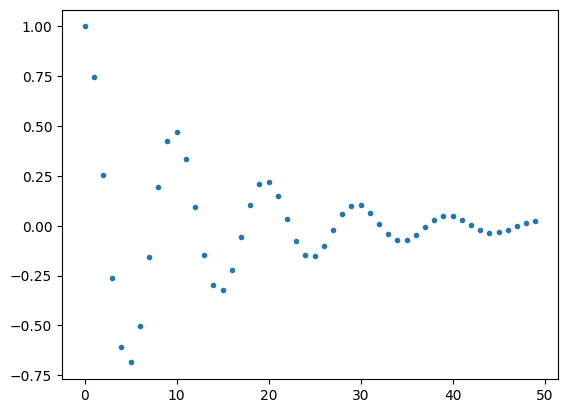

In [3]:
# Plot example training input
plt.plot(train_inputs[0][0:-1],".")
print("question:",train_inputs[0][-1])
print("answer:",train_outputs[0])